# Predicting Clinical Trial Terminations

**Author: Clement Chan**

---
Notes on this notebook: (Add cool description here!)

- ctg.csv notebook was aquired from clinicaltrials.gov on Feb 16th 2024

### Rough Data Dictionary based on clinicaltrials.gov that will change as we go:

---

| Column | Description                                  |Data Type|
|-------|--------------------------------------------|-------|
| NCT Number | Unique ID                            | object |
| Study Title | Title of the Clinical Trial           | object |
| Study URL | URL link to the study on clinicaltrials.gov  | object |
| Acronym | An abbreviation used to identify the clinical study | object|
| Study Status | Categorical column displaying the current position of the study | object (could classify into dummies) |
| Brief Summary | Short description of the clinical study (Includes study hypothesis) | object |
| Study Results | Not sure what the result is (but is in yes or no format) | object (turn to binary?)|
| Conditions | Primary Disease or Condition being studied     | object |
| Interventions | The methods used in the trial to reach the outcome                 | object |
| Primary Outcome Measures | Description of specific primary outcome | object |
| Secondary Outcome Measures | Description of specific secondary outcome | object |
| Sponsor | The corporation or agency that initiates the study | object |
| Collaborators | Other organizations that provide support | object |
| Sex | All: No limit on eligibility based on sex, Male: Only male participants, Female: Only female participants | object (Could change into binary or dummies) |
| Age | Relative age of the participants? Probably need to clarify/change up the name of the values | object (could classify this into dummies)|
| Phases | Clinical trial phase of the study (drug)... need to classify this futher. | object (dummies?)|
| Enrollment | Total estimated number of participants in a study or total actual enrollment? | float -> int |
| Funder Type | Funding type in category? | object (could classify into dummies) |
| Study Type | Interventional, Observational, or Expanded Access | object (definitely dummies) |
| Study Design | Study design based on study type | object |
| Other IDs | Literally other IDs... don't know why this column is useful when we already have NCT number | object |
| Start Date | Estimated/Actual date the first participant was enrolled | object -> date |
| Primary Completion Date | Date the final participant was examined for the first outcome | object -> date |
| Completion Date | Date the final participant was examined | object -> date |
| First Posted | Date the clinical trial was first posted to the public      | object -> date  |
| Last Update Posted | Date the clinical trial was last posted to the public   | object -> date |
| Locations | Where the clinical study will be held | object |


**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

<a id = 'toc'><a/>
## Table of Contents
---
1. [Data Wrangling](#wrangle)

>1.1 [First Look At The Dataset](#first)

>1.2 [Cleaning Missing Data](#miss)

2. [Exploratory Data Analysis (EDA)](#EDA)

>2.1 [Additional Cleaning](#clean)

<a id = 'wrangle'><a/>
## 1. Data Wrangling

---

<a id = 'first'><a/>
### 1.1 First look At The Clinical_Trials Dataset

In [2]:
# Reading the clinical trials dataset
df = pd.read_csv('ctg.csv')

# First 5 rows of dataset
df.head()

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT03630471,Effectiveness of a Problem-solving Interventio...,https://clinicaltrials.gov/study/NCT03630471,PRIDE,COMPLETED,We will conduct a two-arm individually randomi...,NO,"Mental Health Issue (E.G., Depression, Psychos...",BEHAVIORAL: PRIDE 'Step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,SANPRIDE_002,2018-08-20,2019-01-20,2019-02-28,2018-08-14,NaN,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India","Statistical Analysis Plan, https://storage.goo..."
1,NCT05992571,Oral Ketone Monoester Supplementation and Rest...,https://clinicaltrials.gov/study/NCT05992571,NaN,RECRUITING,People who report subjective memory complaints...,NO,Cerebrovascular Function|Cognition,OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB,"Brain network connectivity, Functional connect...",...,Allocation: RANDOMIZED|Intervention Model: CRO...,rs-KME,2023-10-25,2024-08,2024-08,2023-08-15,NaN,2023-12-01,"McMaster University, Hamilton, Ontario, L8S 4K...",NaN
2,NCT01854671,Investigating the Effect of a Prenatal Family ...,https://clinicaltrials.gov/study/NCT01854671,NaN,COMPLETED,The purpose of this study is to measure the di...,NO,Focus: Contraceptive Counseling|Focus: Postpar...,OTHER: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...",...,Allocation: NON_RANDOMIZED|Intervention Model:...,SFPRF13-10,2013-08,2014-12,2014-12,2013-05-15,NaN,2015-08-17,Palestinian Ministry of Health Maternal Child ...,NaN
3,NCT03869671,Pre-exposure Prophylaxis (PrEP) for People Who...,https://clinicaltrials.gov/study/NCT03869671,NaN,WITHDRAWN,People who inject drugs (PWID) experience high...,NO,Intravenous Drug Abuse,BEHAVIORAL: PrEP uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,H-34960|K01DA043412-01A1,2021-03,2022-03,2022-03,2019-03-11,NaN,2021-03-10,NaN,NaN
4,NCT02945371,Tailored Inhibitory Control Training to Revers...,https://clinicaltrials.gov/study/NCT02945371,REV,COMPLETED,Insufficient inhibitory control is one pathway...,NO,Smoking|Alcohol Drinking|Prescription Drug Abu...,BEHAVIORAL: Person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,EPCS20613,2014-09,2016-04,2016-05,2016-10-26,NaN,2016-10-26,"University of Oregon, Social and Affective Neu...",NaN


Let's look at the number of rows and columns in the dataset.

In [3]:
# We can find the shape of the dataset with .shape
f'There are {df.shape[0]} rows and {df.shape[1]} columns.'

'There are 483238 rows and 30 columns.'

**Check for Duplicated rows**

In [4]:
# We can use .duplicated() to find any row that has been duplicated and then .sum() to sum up all the duplicated values
f'There are {df.duplicated().sum()} duplicated rows.'

'There are 0 duplicated rows.'

In [5]:
# Reading the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483238 entries, 0 to 483237
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   NCT Number                  483238 non-null  object 
 1   Study Title                 483238 non-null  object 
 2   Study URL                   483238 non-null  object 
 3   Acronym                     133174 non-null  object 
 4   Study Status                483238 non-null  object 
 5   Brief Summary               482350 non-null  object 
 6   Study Results               483238 non-null  object 
 7   Conditions                  482317 non-null  object 
 8   Interventions               435308 non-null  object 
 9   Primary Outcome Measures    465764 non-null  object 
 10  Secondary Outcome Measures  350835 non-null  object 
 11  Other Outcome Measures      38422 non-null   object 
 12  Sponsor                     483238 non-null  object 
 13  Collaborators 

**Important Notes to Consider:**

- There are 483,238 total rows, but there are large amounts of **missing data** in most of the columns. 
- Most of the columns are objects. (We could change some of these to numerical columns or dates)
- We have 0 duplicated rows, so we don't have to worry about this.

<a id = 'miss'><a/>
### 1.2 Cleaning Missing Data
Let's explore each column ordered by most missing values.

In [6]:
# You can use .isna() to find the number of missing value in each column.
df.isna().sum().sort_values(ascending = False)

Study Documents               450469
Other Outcome Measures        444816
Results First Posted          420886
Acronym                       350064
Collaborators                 325376
Phases                        289380
Secondary Outcome Measures    132403
Locations                      51046
Interventions                  47930
Primary Completion Date        21842
Primary Outcome Measures       17474
Completion Date                16860
Enrollment                      6918
Start Date                      5143
Study Design                    1816
Sex                             1355
Conditions                       921
Study Type                       888
Age                              888
Funder Type                      888
Brief Summary                    888
Other IDs                         57
Study Title                        0
Sponsor                            0
Study Results                      0
First Posted                       0
Study Status                       0
L

In [7]:
# Sorting the missing data by percentages.
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Study Documents               93.218869
Other Outcome Measures        92.049052
Results First Posted          87.097041
Acronym                       72.441323
Collaborators                 67.332453
Phases                        59.883536
Secondary Outcome Measures    27.399128
Locations                     10.563325
Interventions                  9.918508
Primary Completion Date        4.519926
Primary Outcome Measures       3.616024
Completion Date                3.488964
Enrollment                     1.431593
Start Date                     1.064279
Study Design                   0.375798
Sex                            0.280400
Conditions                     0.190589
Study Type                     0.183760
Age                            0.183760
Funder Type                    0.183760
Brief Summary                  0.183760
Other IDs                      0.011795
Study Title                    0.000000
Sponsor                        0.000000
Study Results                  0.000000


Wow that's a lot of missing values. Let's start with the `Study Documents` column.

In [8]:
# Finding out what the values are in the column:
df['Study Documents'].value_counts()

Study Documents
Statistical Analysis Plan, https://storage.googleapis.com/ctgov2-large-docs/71/NCT03630471/SAP_000.pdf                                                                                                                                                                                                                                                                                                      1
Study Protocol and Statistical Analysis Plan, https://storage.googleapis.com/ctgov2-large-docs/95/NCT03347695/Prot_SAP_000.pdf|Informed Consent Form: Informed Consent Form for phase1, https://storage.googleapis.com/ctgov2-large-docs/95/NCT03347695/ICF_001.pdf|Informed Consent Form: Informed Consent Form for phase2, https://storage.googleapis.com/ctgov2-large-docs/95/NCT03347695/ICF_002.pdf    1
Study Protocol, https://storage.googleapis.com/ctgov2-large-docs/83/NCT03850483/Prot_000.pdf|Statistical Analysis Plan, https://storage.googleapis.com/ctgov2-large-docs/83/NCT03850483/SAP_

The `Study Documents` column consists of the clinical design report of each study. However, the column has **450,469** missing values out of 483,238 rows which is about 93% of the dataset N/A, and this column's information would not be significant for our predictive model unless we will be looking into each PDF file, which is not the scope of this project.

Therefore, it is safe to drop this column for our dataset.

In [9]:
# Dropping the `Study Documents` column
df.drop(columns = 'Study Documents', inplace = True)

In [10]:
# Sanity check to confirm dropped column
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Other Outcome Measures        92.049052
Results First Posted          87.097041
Acronym                       72.441323
Collaborators                 67.332453
Phases                        59.883536
Secondary Outcome Measures    27.399128
Locations                     10.563325
Interventions                  9.918508
Primary Completion Date        4.519926
Primary Outcome Measures       3.616024
Completion Date                3.488964
Enrollment                     1.431593
Start Date                     1.064279
Study Design                   0.375798
Sex                            0.280400
Conditions                     0.190589
Age                            0.183760
Funder Type                    0.183760
Study Type                     0.183760
Brief Summary                  0.183760
Other IDs                      0.011795
Study Title                    0.000000
Sponsor                        0.000000
Study Results                  0.000000
Study Status                   0.000000


Next, we will look in the `Other Outcome Measures` column which has 92% missing values.

In [11]:
# Checking out the `Other Outcome Measures` column
df['Other Outcome Measures'].value_counts()

Other Outcome Measures
The dose of CSC vaccine, up to 3 months                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

The `Other Outcome Measures` column consists of other measures used to evaluate the clinical study. Since we have most of the values missing (444,816) and we have more data evaluating measures in the `Primary Outcome Measures` and `Secondary Outcome Measures` columns, we can safely drop this column as it has too many missing values.

In [12]:
# Dropping the `Study Documents` column
df.drop(columns = 'Other Outcome Measures', inplace = True)

In [13]:
# Sanity check to confirm column drop
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Results First Posted          87.097041
Acronym                       72.441323
Collaborators                 67.332453
Phases                        59.883536
Secondary Outcome Measures    27.399128
Locations                     10.563325
Interventions                  9.918508
Primary Completion Date        4.519926
Primary Outcome Measures       3.616024
Completion Date                3.488964
Enrollment                     1.431593
Start Date                     1.064279
Study Design                   0.375798
Sex                            0.280400
Conditions                     0.190589
Funder Type                    0.183760
Study Type                     0.183760
Age                            0.183760
Brief Summary                  0.183760
Other IDs                      0.011795
Study Title                    0.000000
Sponsor                        0.000000
Study Results                  0.000000
Study Status                   0.000000
First Posted                   0.000000


Next, let's explore the `Results First Posted` column which has **87%** of the dataset missing.

In [14]:
# Checking out the `Other Outcome Measures` column
df['Results First Posted'].value_counts()

Results First Posted
2017-04-17    65
2014-05-16    56
2017-04-14    54
2017-09-27    52
2017-04-18    51
              ..
2024-01-24     1
2020-01-01     1
2023-10-28     1
2014-02-23     1
2015-05-16     1
Name: count, Length: 4937, dtype: int64

The `Results First Posted` column is comprised of dates where the clinical study first posts their results to the public. This information is not really related to our goal of predicting trial terminations, and since most of the data is missing, we can also drop this column.

In [15]:
# Dropping the `Results First Posted` column
df.drop(columns = 'Results First Posted', inplace = True)

In [16]:
# Sanity check to confirm column drop
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Acronym                       72.441323
Collaborators                 67.332453
Phases                        59.883536
Secondary Outcome Measures    27.399128
Locations                     10.563325
Interventions                  9.918508
Primary Completion Date        4.519926
Primary Outcome Measures       3.616024
Completion Date                3.488964
Enrollment                     1.431593
Start Date                     1.064279
Study Design                   0.375798
Sex                            0.280400
Conditions                     0.190589
Age                            0.183760
Funder Type                    0.183760
Study Type                     0.183760
Brief Summary                  0.183760
Other IDs                      0.011795
Study Title                    0.000000
Sponsor                        0.000000
Study Results                  0.000000
Study Status                   0.000000
Study URL                      0.000000
First Posted                   0.000000


Next, let's examine the `Acronym` column which has **72.4%** of the data missing.

In [17]:
# Checking the values in `Acronym` column
df['Acronym'].value_counts()

Acronym
IMPACT       129
COVID-19     122
SMART        111
RCT           88
STAR          78
            ... 
boron_gel      1
CUMACA-M       1
PR11           1
NutriCim       1
AFOCUFF        1
Name: count, Length: 104724, dtype: int64

According to the ClinicalTrials.gov website, the `Acronym` column is used as an abbreviation to publicly identify the study, **if any**. This indicates that a lot of clinical trials did not include an Acronym. We could also impute the string 'none', but understanding that there are more than 70% of the data missing, and we can use other information from other columns for this model, we can safely drop this column.

In [18]:
# Dropping the `Acronym` column
df.drop(columns = 'Acronym', inplace = True)

In [19]:
# Sanity check to confirm column drop
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Collaborators                 67.332453
Phases                        59.883536
Secondary Outcome Measures    27.399128
Locations                     10.563325
Interventions                  9.918508
Primary Completion Date        4.519926
Primary Outcome Measures       3.616024
Completion Date                3.488964
Enrollment                     1.431593
Start Date                     1.064279
Study Design                   0.375798
Sex                            0.280400
Conditions                     0.190589
Study Type                     0.183760
Funder Type                    0.183760
Age                            0.183760
Brief Summary                  0.183760
Other IDs                      0.011795
Study Title                    0.000000
Sponsor                        0.000000
Study Results                  0.000000
Study Status                   0.000000
Study URL                      0.000000
First Posted                   0.000000
Last Update Posted             0.000000


Great! Now we can check out the missing values from the `Collaborators` column which has **67%** of the data missing.

In [20]:
# Checking the values in `Collaborators` column
df['Collaborators'].value_counts()

Collaborators
National Cancer Institute (NCI)                                                                                                                                                                                         7920
National Heart, Lung, and Blood Institute (NHLBI)                                                                                                                                                                       1689
National Institute of Mental Health (NIMH)                                                                                                                                                                              1590
National Institute on Drug Abuse (NIDA)                                                                                                                                                                                 1394
Merck Sharp & Dohme LLC                                                                               

Based on the clinicaltrials.gov website, the `Collaborators` column only lists out studies where there are extra supporters for the clinical trial. We can replace the missing values with the string `none` to indicate no collaborators. We can also change the distinct collaborators into 'other' for more organization?

In [21]:
#using fillna() to fill the missing values with the string 'none'
df['Collaborators'] = df['Collaborators'].fillna('none')

In [22]:
# Sanity check
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Phases                        59.883536
Secondary Outcome Measures    27.399128
Locations                     10.563325
Interventions                  9.918508
Primary Completion Date        4.519926
Primary Outcome Measures       3.616024
Completion Date                3.488964
Enrollment                     1.431593
Start Date                     1.064279
Study Design                   0.375798
Sex                            0.280400
Conditions                     0.190589
Study Type                     0.183760
Funder Type                    0.183760
Age                            0.183760
Brief Summary                  0.183760
Other IDs                      0.011795
Study Title                    0.000000
Collaborators                  0.000000
Sponsor                        0.000000
Study Results                  0.000000
Study Status                   0.000000
Study URL                      0.000000
First Posted                   0.000000
Last Update Posted             0.000000


Next, we will check the `Phases` column which has around **60%** of the data missing

In [23]:
# Checking the values in `Collaborators` column
df['Phases'].value_counts()

Phases
PHASE2           56500
PHASE1           41845
PHASE3           37654
PHASE4           31876
PHASE1|PHASE2    14385
PHASE2|PHASE3     6697
EARLY_PHASE1      4901
Name: count, dtype: int64

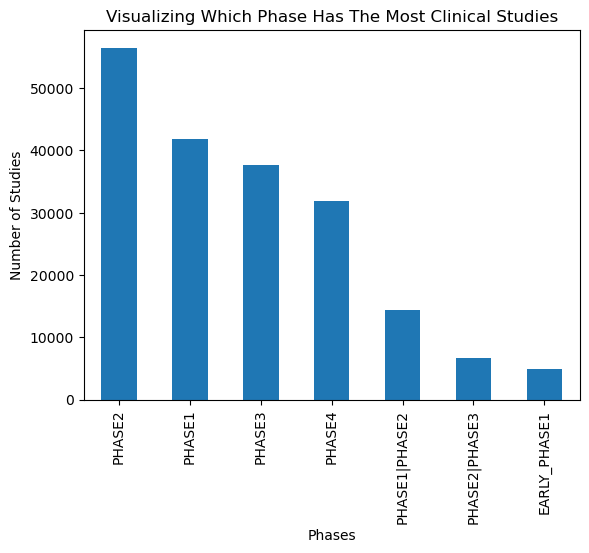

In [24]:
# Visualizing the distribution
plt.figure()

df['Phases'].value_counts().plot(kind='bar')
plt.xlabel('Phases')
plt.ylabel('Number of Studies')
plt.title('Visualizing which phase has the most clinical studies'.title())

plt.show()

Here we can see that most clinical trials are in PHASE 2, while very few remain in EARLY_PHASE 1.

From the clinicaltrials.gov documentation, Trials without phases are listed as N/A which means that we can replace the missing values into a string 'NO PHASE'.

In [25]:
# We can use the .fillna() function to fill the NaN values.
df['Phases'] = df['Phases'].fillna('NO PHASE')

In [26]:
# Sanity check that the missing values have been filled
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Secondary Outcome Measures    27.399128
Locations                     10.563325
Interventions                  9.918508
Primary Completion Date        4.519926
Primary Outcome Measures       3.616024
Completion Date                3.488964
Enrollment                     1.431593
Start Date                     1.064279
Study Design                   0.375798
Sex                            0.280400
Conditions                     0.190589
Study Type                     0.183760
Funder Type                    0.183760
Age                            0.183760
Brief Summary                  0.183760
Other IDs                      0.011795
Phases                         0.000000
Study Title                    0.000000
Collaborators                  0.000000
Sponsor                        0.000000
Study Results                  0.000000
Study Status                   0.000000
Study URL                      0.000000
First Posted                   0.000000
Last Update Posted             0.000000


Next, let's fix the `Secondary Outcome Measures` column which has **27%** of the data missing.

In [27]:
# Checking the values in `Secondary Outcome Measures` column
df['Secondary Outcome Measures'].value_counts()

Secondary Outcome Measures
Progress free survival（PFS）, 1 year|Overall survival（OS）, 3 years                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

According to the clinicaltrials.gov website, `Secondary Outcome Measures` has a lesser importance than the `Primary Outcome Measures`. Similar with the `Other Outcome Measures`, some clinical trials did not have secondary outcomes, so we can classify these missing values as the string 'none'.

We can also use word embedding to create additional features by matching keywords in the outcomes for a better prediction for trial eliminations.

In [28]:
# We can use the .fillna() function to fill the NaN values.
df['Secondary Outcome Measures'] = df['Secondary Outcome Measures'].fillna('none')

In [29]:
# Sanity check that the missing values have been filled
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Locations                     10.563325
Interventions                  9.918508
Primary Completion Date        4.519926
Primary Outcome Measures       3.616024
Completion Date                3.488964
Enrollment                     1.431593
Start Date                     1.064279
Study Design                   0.375798
Sex                            0.280400
Conditions                     0.190589
Study Type                     0.183760
Funder Type                    0.183760
Age                            0.183760
Brief Summary                  0.183760
Other IDs                      0.011795
Study Title                    0.000000
Phases                         0.000000
Collaborators                  0.000000
Sponsor                        0.000000
Secondary Outcome Measures     0.000000
Study Results                  0.000000
Study Status                   0.000000
Study URL                      0.000000
First Posted                   0.000000
Last Update Posted             0.000000


The `Locations` column is next with **10.5%** of the data missing.

In [30]:
# Checking the values in the `Locations` column
df['Locations'].value_counts()

Locations
National Institutes of Health Clinical Center, 9000 Rockville Pike, Bethesda, Maryland, 20892, United States                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

The `Locations` column gives information on where the facility of the clinical trial is hosted. Since this is a very valuable column, we cannot drop it, and we should replace the missing values with the string 'unknown'.

Additionally, we can see that each study has multiple locations. So we should figure out how to pick the location that has the most participants.

In [31]:
# We can use the .fillna() function to fill the NaN values.
df['Locations'] = df['Locations'].fillna('unknown')

In [32]:
# Sanity check that the missing values have been filled
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Interventions                 9.918508
Primary Completion Date       4.519926
Primary Outcome Measures      3.616024
Completion Date               3.488964
Enrollment                    1.431593
Start Date                    1.064279
Study Design                  0.375798
Sex                           0.280400
Conditions                    0.190589
Age                           0.183760
Funder Type                   0.183760
Brief Summary                 0.183760
Study Type                    0.183760
Other IDs                     0.011795
Last Update Posted            0.000000
First Posted                  0.000000
NCT Number                    0.000000
Phases                        0.000000
Study Title                   0.000000
Collaborators                 0.000000
Sponsor                       0.000000
Secondary Outcome Measures    0.000000
Study Results                 0.000000
Study Status                  0.000000
Study URL                     0.000000
Locations                

The next column to fix is the `Interventions` column, which has **9.9%** missing data.

In [33]:
# Checking the values in the `Interventions` column
df['Interventions'].value_counts()

Interventions
OTHER: No intervention                                                                          1083
OTHER: no intervention                                                                           410
OTHER: Questionnaire                                                                             318
OTHER: Exercise                                                                                  273
OTHER: No Intervention                                                                           249
                                                                                                ... 
DEVICE: Patient specific instrumentation (MRI)|DEVICE: Patient specific instrumentation (CT)       1
DRUG: Bone Morphogenetic Protein 2|PROCEDURE: Autologous bone graft                                1
OTHER: HaRTS-TRENDS|OTHER: Standard Care (SC)                                                      1
DIAGNOSTIC_TEST: Stroke simulation and machine learning                      

The `Interventions` column is defined as a specific treatment, procedure, or action taken to treat or prevent disease. Additionally, we can point out that some strings are spelled the same way but have different letter cases.
1. Convert all values to lowercase.
2. Replace the missing values with the string 'unknown' since we don't know what interventions the study has used.

In [34]:
# We can convert all strings to lowercase with the str.lower() method
df['Interventions'] = df['Interventions'].str.lower()

In [35]:
# We can use the .fillna() function to fill the NaN values.
df['Interventions'] = df['Interventions'].fillna('unknown')

In [36]:
# Sanity check 1: making sure the strings are changed to lower case
df['Interventions'].value_counts()

Interventions
unknown                                                              47930
other: no intervention                                                1774
other: questionnaire                                                   430
other: exercise                                                        345
behavioral: exercise                                                   274
                                                                     ...  
biological: zoster vaccine, live, (oka-merck)                            1
drug: tonabersat|drug: tonabersat|drug: placebo                          1
drug: ticagrelor|drug: prasugrel|drug: clopidogrel                       1
behavioral: exercise behavior change for resistance exercise             1
device: solx gold shunt gms-plus|device: ahmed fp7 glaucoma valve        1
Name: count, Length: 346864, dtype: int64

In [37]:
# Sanity check 2: that the missing values have been filled
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Primary Completion Date       4.519926
Primary Outcome Measures      3.616024
Completion Date               3.488964
Enrollment                    1.431593
Start Date                    1.064279
Study Design                  0.375798
Sex                           0.280400
Conditions                    0.190589
Age                           0.183760
Brief Summary                 0.183760
Study Type                    0.183760
Funder Type                   0.183760
Other IDs                     0.011795
Last Update Posted            0.000000
First Posted                  0.000000
NCT Number                    0.000000
Phases                        0.000000
Study Title                   0.000000
Collaborators                 0.000000
Sponsor                       0.000000
Secondary Outcome Measures    0.000000
Interventions                 0.000000
Study Results                 0.000000
Study Status                  0.000000
Study URL                     0.000000
Locations                

Next, we will check out the `Primary Completion Date` column which has **4.5%** data missing.

In [38]:
# Checking the values in the `Primary Completion Date` column
df['Primary Completion Date'].value_counts()

Primary Completion Date
2023-12-31    3496
2024-12-31    2992
2015-12       2971
2024-12       2575
2014-12       2563
              ... 
2008-09-26       1
2029-05-29       1
2011-09-10       1
2000-06-09       1
2006-06-20       1
Name: count, Length: 9254, dtype: int64

The `Primary Completion Date` column consists of dates where the trial finishes and collects its data from the first outcome. Since this column will be useful in determining the duration of the first outcome, we cannot drop this column. In terms of the missing values, we can change them into the string 'unknown' for now.

In [39]:
# We can use the .fillna() function to fill the NaN values.
df['Primary Completion Date'] = df['Primary Completion Date'].fillna('unknown')

In [40]:
# Sanity check that the missing values have been filled
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Primary Outcome Measures      3.616024
Completion Date               3.488964
Enrollment                    1.431593
Start Date                    1.064279
Study Design                  0.375798
Sex                           0.280400
Conditions                    0.190589
Age                           0.183760
Brief Summary                 0.183760
Study Type                    0.183760
Funder Type                   0.183760
Other IDs                     0.011795
Last Update Posted            0.000000
First Posted                  0.000000
Primary Completion Date       0.000000
NCT Number                    0.000000
Phases                        0.000000
Study Title                   0.000000
Collaborators                 0.000000
Sponsor                       0.000000
Secondary Outcome Measures    0.000000
Interventions                 0.000000
Study Results                 0.000000
Study Status                  0.000000
Study URL                     0.000000
Locations                

Now, we will fix the `Primary Outcome Measures` column which has **3.61%** data missing.

In [41]:
# Checking the values in the `Primary Outcome Measures` column
df['Primary Outcome Measures'].value_counts()

Primary Outcome Measures
Bioequivalence, within 30 days                                                                                                                                                                                                                   118
Bioequivalence                                                                                                                                                                                                                                    68
Overall survival                                                                                                                                                                                                                                  49
Minimal Erythema Dose (MED), Up to 15 minutes|Minimal Persistent Pigment Darkening Dose (MPPD), Up to 15 minutes                                                                                                                                

The `Primary Outcome Measures` column is the main indicator of what the outcome of the trial should be and how it would be measured. We will fill the missing values with the string 'unknown'.

In [42]:
# We can use the .fillna() function to fill the NaN values.
df['Primary Outcome Measures'] = df['Primary Outcome Measures'].fillna('unknown')

In [43]:
# Sanity check that the missing values have been filled
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Completion Date               3.488964
Enrollment                    1.431593
Start Date                    1.064279
Study Design                  0.375798
Sex                           0.280400
Conditions                    0.190589
Age                           0.183760
Brief Summary                 0.183760
Study Type                    0.183760
Funder Type                   0.183760
Other IDs                     0.011795
Last Update Posted            0.000000
First Posted                  0.000000
Primary Completion Date       0.000000
NCT Number                    0.000000
Phases                        0.000000
Study Title                   0.000000
Collaborators                 0.000000
Sponsor                       0.000000
Secondary Outcome Measures    0.000000
Primary Outcome Measures      0.000000
Interventions                 0.000000
Study Results                 0.000000
Study Status                  0.000000
Study URL                     0.000000
Locations                

Next, we will work on the `Completion Date` column which has **3.5%** data missing.

In [44]:
# Checking the values in the `Completion Date` column
df['Completion Date'].value_counts()

Completion Date
2024-12-31    3825
2023-12-31    3470
2024-12       3271
2015-12       2898
2014-12       2687
              ... 
2013-06-13       1
2030-02-22       1
2034-03-30       1
1995-08-07       1
2004-11-29       1
Name: count, Length: 9781, dtype: int64

The `Completion Date` column consists of dates when the final participant has finished or when the clinical trial has concluded it's findings. It is important to note that most of the studies finish at the end of the year, and some of the dates do not have a 'day' listed. We will fill the missing data with the string 'unknown' since we don't know if the study has ended yet.

In [45]:
# We can use the .fillna() function to fill the NaN values.
df['Completion Date'] = df['Completion Date'].fillna('unknown')

In [46]:
# Sanity check that the missing values have been filled
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Enrollment                    1.431593
Start Date                    1.064279
Study Design                  0.375798
Sex                           0.280400
Conditions                    0.190589
Age                           0.183760
Brief Summary                 0.183760
Study Type                    0.183760
Funder Type                   0.183760
Other IDs                     0.011795
Last Update Posted            0.000000
First Posted                  0.000000
Completion Date               0.000000
Primary Completion Date       0.000000
NCT Number                    0.000000
Phases                        0.000000
Study Title                   0.000000
Collaborators                 0.000000
Sponsor                       0.000000
Secondary Outcome Measures    0.000000
Primary Outcome Measures      0.000000
Interventions                 0.000000
Study Results                 0.000000
Study Status                  0.000000
Study URL                     0.000000
Locations                

We will fix the `Enrollment` column next, which has **1.43%** data missing.

In [47]:
# Checking the values in the `Enrollment` column
df['Enrollment'].value_counts()

Enrollment
30.0        15910
60.0        15792
100.0       14534
40.0        14202
20.0        13928
            ...  
419734.0        1
25600.0         1
254432.0        1
10385.0         1
290286.0        1
Name: count, Length: 8156, dtype: int64

We can see from the values that there is a big range from 20 participants all the way to 290286 participants in each study. Let's look at the summary statisticals more closely in this column.

In [48]:
# using .describe() to find the summary statistics
df['Enrollment'].describe()

count    4.763200e+05
mean     5.318643e+03
std      4.885337e+05
min      0.000000e+00
25%      3.000000e+01
50%      6.900000e+01
75%      2.000000e+02
max      1.888141e+08
Name: Enrollment, dtype: float64

Here, we can see that the data is very skewed as the **median is 69 participants** and the **mean is 5318 participants**. The range of the participants go from 0 to 1.88e+08. Let's look at this further with a histogram plot

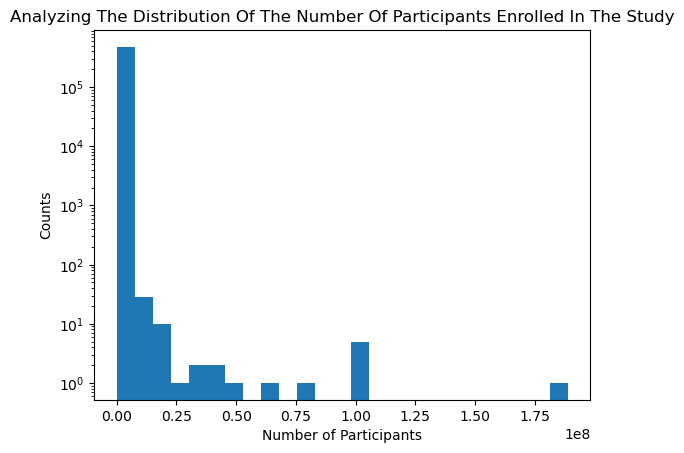

In [49]:
# Plotting the histogram of the Enrollment column
plt.figure()

plt.hist(df['Enrollment'], bins = 25) # We are using a logscale for the y-axis due to the exponentially large range in values
plt.yscale('log')

plt.xlabel('Number of Participants')
plt.ylabel('Counts')
plt.title('Analyzing the distribution of the number of participants enrolled in the study'.title())

plt.show()

The data is heavily right skewed, which indicates that we should fill our missing values with the median which is where majority of the data lies. Additionally, it would be best practice to change the dtype of values in `Enrollment` to 'int' since we are dealing with whole numbers of participants.

In [50]:
# Filling the missing values with the median
df['Enrollment'] = df['Enrollment'].fillna(69)

In [51]:
df['Enrollment'] = df['Enrollment'].astype(int)

In [52]:
# Sanity check that the missing values have been filled
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Start Date                    1.064279
Study Design                  0.375798
Sex                           0.280400
Conditions                    0.190589
Age                           0.183760
Brief Summary                 0.183760
Study Type                    0.183760
Funder Type                   0.183760
Other IDs                     0.011795
Enrollment                    0.000000
Last Update Posted            0.000000
First Posted                  0.000000
Completion Date               0.000000
Primary Completion Date       0.000000
NCT Number                    0.000000
Phases                        0.000000
Study Title                   0.000000
Collaborators                 0.000000
Sponsor                       0.000000
Secondary Outcome Measures    0.000000
Primary Outcome Measures      0.000000
Interventions                 0.000000
Study Results                 0.000000
Study Status                  0.000000
Study URL                     0.000000
Locations                

Great! Now let's move onto the `Start Date` column which has **1.06%** missing values.

In [53]:
# Checking the values in the `Start Date` column
df['Start Date'].value_counts()

Start Date
2014-01       2087
2015-01       2025
2013-01       1959
2012-01       1937
2011-01       1924
              ... 
1998-03-24       1
2000-03-29       1
2009-04-18       1
1999-12-06       1
2012-10-28       1
Name: count, Length: 8659, dtype: int64

The `Start Date` column consists of dates of when the study first starts or when the first participant is enrolled. Since we don't know the start dates of the missing values, we can just change the value into the string "unknown"

In [54]:
# Filling the missing values
df['Start Date'] = df['Start Date'].fillna('unknown')

In [55]:
# Sanity check that the missing values have been filled
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Study Design                  0.375798
Sex                           0.280400
Conditions                    0.190589
Age                           0.183760
Brief Summary                 0.183760
Study Type                    0.183760
Funder Type                   0.183760
Other IDs                     0.011795
Enrollment                    0.000000
Last Update Posted            0.000000
First Posted                  0.000000
Completion Date               0.000000
Primary Completion Date       0.000000
Start Date                    0.000000
NCT Number                    0.000000
Phases                        0.000000
Study Title                   0.000000
Collaborators                 0.000000
Sponsor                       0.000000
Secondary Outcome Measures    0.000000
Primary Outcome Measures      0.000000
Interventions                 0.000000
Study Results                 0.000000
Study Status                  0.000000
Study URL                     0.000000
Locations                

Next, let's take a look at the `Study Design` column which has **0.37%** data missing.

In [56]:
# Checking the values in the `Study Design` column
df['Study Design'].value_counts()

Study Design
Observational Model: |Time Perspective: p                                                                                                                          110180
Allocation: NA|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: TREATMENT                                                                            52601
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT                                                                        42532
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT     21277
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (PARTICIPANT, INVESTIGATOR)|Primary Purpose: TREATMENT                                          13659
                                                                                                                                         

The `Study Design` column contains designs of both interventional and observational studies. We need to classify these further in the future. For now we will just fill the missing values with the string 'unknown' since we don't know where those values would fall in.

In [57]:
# Filling the missing values
df['Study Design'] = df['Study Design'].fillna('unknown')

In [58]:
# Sanity check that the missing values have been filled
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Sex                           0.280400
Conditions                    0.190589
Age                           0.183760
Brief Summary                 0.183760
Study Type                    0.183760
Funder Type                   0.183760
Other IDs                     0.011795
Enrollment                    0.000000
Last Update Posted            0.000000
First Posted                  0.000000
Completion Date               0.000000
Primary Completion Date       0.000000
Start Date                    0.000000
Study Design                  0.000000
NCT Number                    0.000000
Phases                        0.000000
Study Title                   0.000000
Collaborators                 0.000000
Sponsor                       0.000000
Secondary Outcome Measures    0.000000
Primary Outcome Measures      0.000000
Interventions                 0.000000
Study Results                 0.000000
Study Status                  0.000000
Study URL                     0.000000
Locations                

Next is the `Sex` column which has **0.28%** data missing.

In [59]:
# Checking the values in the `Sex` column
df['Sex'].value_counts()

Sex
ALL       414720
FEMALE     46562
MALE       20601
Name: count, dtype: int64

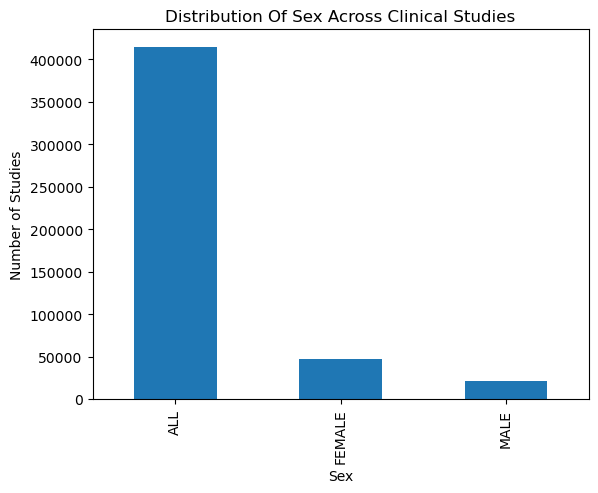

In [60]:
plt.figure()

df['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Number of Studies')
plt.title('Distribution of sex across clinical studies'.title())

plt.show()

For the `Sex` column, 'ALL' indicates no limit on eligibility based on the sex of the participants. It is also interesting to see that there are much more female only studies than male only studies. For the missing values, we will replace them with the string 'unknown' for now.

In [61]:
# Filling the missing values
df['Sex'] = df['Sex'].fillna('unknown')

In [62]:
# Sanity check that the missing values have been filled
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Conditions                    0.190589
Age                           0.183760
Brief Summary                 0.183760
Study Type                    0.183760
Funder Type                   0.183760
Other IDs                     0.011795
Phases                        0.000000
Last Update Posted            0.000000
First Posted                  0.000000
Completion Date               0.000000
Primary Completion Date       0.000000
Start Date                    0.000000
Study Design                  0.000000
Enrollment                    0.000000
NCT Number                    0.000000
Study Title                   0.000000
Sex                           0.000000
Collaborators                 0.000000
Sponsor                       0.000000
Secondary Outcome Measures    0.000000
Primary Outcome Measures      0.000000
Interventions                 0.000000
Study Results                 0.000000
Study Status                  0.000000
Study URL                     0.000000
Locations                

Next, let's explore the `Conditions` column, which has **0.19%** of the data missing.

In [63]:
# Checking the values in the `Conditions` column
df['Conditions'].value_counts()

Conditions
Healthy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           7996
Breast Cancer                                                         

The `Conditions` column consists of data of the primary disease or the condition being studied in the trial. We will also replace the missing values with the string 'unknown' for now.

In [64]:
# Filling the missing values
df['Conditions'] = df['Conditions'].fillna('unknown')

In [65]:
# Sanity check that the missing values have been filled
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Age                           0.183760
Brief Summary                 0.183760
Study Type                    0.183760
Funder Type                   0.183760
Other IDs                     0.011795
Phases                        0.000000
Last Update Posted            0.000000
First Posted                  0.000000
Completion Date               0.000000
Primary Completion Date       0.000000
Start Date                    0.000000
Study Design                  0.000000
Enrollment                    0.000000
NCT Number                    0.000000
Study Title                   0.000000
Sex                           0.000000
Collaborators                 0.000000
Sponsor                       0.000000
Secondary Outcome Measures    0.000000
Primary Outcome Measures      0.000000
Interventions                 0.000000
Conditions                    0.000000
Study Results                 0.000000
Study Status                  0.000000
Study URL                     0.000000
Locations                

Interesting to note that the columns `Age`, `Brief Summary`, `Study Type`, and `Funder Type` all have the same number of missing data. Let's explore the dataframe some more:

In [66]:
# We can specifically look at the rows that have missing values with .isna().any()
df[df.isna().any(axis=1)].sample(5)

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Funder Type,Study Type,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
401571,NCT03124953,[Trial of device that is not approved or clear...,https://clinicaltrials.gov/study/NCT03124953,WITHHELD,NaN,NO,unknown,unknown,unknown,none,...,NaN,NaN,unknown,TR-1000-TP-1007,unknown,unknown,unknown,2017-04-24,2017-04-24,unknown
240039,NCT06111495,[Trial of device that is not approved or clear...,https://clinicaltrials.gov/study/NCT06111495,WITHHELD,NaN,NO,unknown,unknown,unknown,none,...,NaN,NaN,unknown,PTL-1000221,unknown,unknown,unknown,2023-11-01,2023-11-01,unknown
3123,NCT05980039,[Trial of device that is not approved or clear...,https://clinicaltrials.gov/study/NCT05980039,WITHHELD,NaN,NO,unknown,unknown,unknown,none,...,NaN,NaN,unknown,CP101125,unknown,unknown,unknown,2023-08-07,2023-10-23,unknown
141260,NCT00957138,[Trial of device that is not approved or clear...,https://clinicaltrials.gov/study/NCT00957138,WITHHELD,NaN,NO,unknown,unknown,unknown,none,...,NaN,NaN,unknown,AS-02-31,unknown,unknown,unknown,2009-08-12,2016-07-21,unknown
34909,NCT02223663,[Trial of device that is not approved or clear...,https://clinicaltrials.gov/study/NCT02223663,WITHHELD,NaN,NO,unknown,unknown,unknown,none,...,NaN,NaN,unknown,075593,unknown,unknown,unknown,2014-08-22,2018-04-05,unknown


Here we can see that the missing values are consistently in all the rows with the columns `Age`, `Brief Summary`, `Study Type`, and `Funder Type`. Additionally, they all have the study status 'WITHHELD', meaning that the the clinical study was suppressed and never made it to the actual trial phase (which is not important to our model). Let's make sure by comparing the number of NaN values with the number of 'WITHHELD' values in the `Study Status` column.

In [67]:
# Using .value_counts() to find number of WITHHELD
df['Study Status'].value_counts()

Study Status
COMPLETED                    263380
RECRUITING                    66150
UNKNOWN                       64828
TERMINATED                    28014
NOT_YET_RECRUITING            20055
ACTIVE_NOT_RECRUITING         19702
WITHDRAWN                     13716
ENROLLING_BY_INVITATION        3931
SUSPENDED                      1646
WITHHELD                        888
NO_LONGER_AVAILABLE             446
AVAILABLE                       259
APPROVED_FOR_MARKETING          197
TEMPORARILY_NOT_AVAILABLE        26
Name: count, dtype: int64

In [68]:
# Finding the number of missing values in the 'Age' column with isna().sum()
df['Age'].isna().sum()

888

Now that we know that the missing values in those columns are caused by the 'WITHHELD' status in the `Study Status` column, we can just drop the rows that have the string 'WITHHELD' to remove all the NaN values.

In [69]:
# Slicing out the index where study status has the value 'WITHHELD' and then dropping it from the dataframe
df.drop(df[df['Study Status'] == 'WITHHELD'].index, inplace = True)

In [70]:
# Sanity check: we should have 438,238 - 888 = 482,350 total rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482350 entries, 0 to 483237
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NCT Number                  482350 non-null  object
 1   Study Title                 482350 non-null  object
 2   Study URL                   482350 non-null  object
 3   Study Status                482350 non-null  object
 4   Brief Summary               482350 non-null  object
 5   Study Results               482350 non-null  object
 6   Conditions                  482350 non-null  object
 7   Interventions               482350 non-null  object
 8   Primary Outcome Measures    482350 non-null  object
 9   Secondary Outcome Measures  482350 non-null  object
 10  Sponsor                     482350 non-null  object
 11  Collaborators               482350 non-null  object
 12  Sex                         482350 non-null  object
 13  Age                         482350

Great! Now we have 482,350 rows now that 888 entries have been removed. We also need to reset the index after rows have been removed. Next, we will check the final column with missing values:

In [71]:
df.reset_index(drop = True, inplace = True)

In [72]:
# Checking for percentages of missing values in dataframe
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

Other IDs                     0.01161
NCT Number                    0.00000
Study Title                   0.00000
Last Update Posted            0.00000
First Posted                  0.00000
Completion Date               0.00000
Primary Completion Date       0.00000
Start Date                    0.00000
Study Design                  0.00000
Study Type                    0.00000
Funder Type                   0.00000
Enrollment                    0.00000
Phases                        0.00000
Age                           0.00000
Sex                           0.00000
Collaborators                 0.00000
Sponsor                       0.00000
Secondary Outcome Measures    0.00000
Primary Outcome Measures      0.00000
Interventions                 0.00000
Conditions                    0.00000
Study Results                 0.00000
Brief Summary                 0.00000
Study Status                  0.00000
Study URL                     0.00000
Locations                     0.00000
dtype: float

Even though the column `Other IDs` have very little missing data (**0.01%** data missing), we don't really have a use for the IDs, since we won't be including a dictionary for what the 'Other IDs' mean. Therefore, we will remove that column from the dataset.

In [73]:
# Dropping the `Other IDs` column
df.drop(columns = 'Other IDs', inplace = True)

In [74]:
# Final check for missing values in the dataset
((df.isna().sum() / df.shape[0])*100).sort_values(ascending = False)

NCT Number                    0.0
Age                           0.0
Last Update Posted            0.0
First Posted                  0.0
Completion Date               0.0
Primary Completion Date       0.0
Start Date                    0.0
Study Design                  0.0
Study Type                    0.0
Funder Type                   0.0
Enrollment                    0.0
Phases                        0.0
Sex                           0.0
Study Title                   0.0
Collaborators                 0.0
Sponsor                       0.0
Secondary Outcome Measures    0.0
Primary Outcome Measures      0.0
Interventions                 0.0
Conditions                    0.0
Study Results                 0.0
Brief Summary                 0.0
Study Status                  0.0
Study URL                     0.0
Locations                     0.0
dtype: float64

Now that all the missing values have been filled. Let's explore each column of the dataframe and find out what information we do not need for the model.

In [75]:
# this option displays all columns in the dataframe
pd.options.display.max_columns = None

In [76]:
# Reading the updated dataframe
df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
0,NCT03630471,Effectiveness of a Problem-solving Interventio...,https://clinicaltrials.gov/study/NCT03630471,COMPLETED,We will conduct a two-arm individually randomi...,NO,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,ALL,"CHILD, ADULT",NO PHASE,250,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,2018-08-14,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India"
1,NCT05992571,Oral Ketone Monoester Supplementation and Rest...,https://clinicaltrials.gov/study/NCT05992571,RECRUITING,People who report subjective memory complaints...,NO,Cerebrovascular Function|Cognition,other: placebo|dietary_supplement: β-ohb,"Brain network connectivity, Functional connect...","Working memory, Computer battery to assess wor...",McMaster University,"Alzheimer's Society of Brant, Haldimand Norfol...",ALL,"ADULT, OLDER_ADULT",NO PHASE,30,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2023-10-25,2024-08,2024-08,2023-08-15,2023-12-01,"McMaster University, Hamilton, Ontario, L8S 4K..."
2,NCT01854671,Investigating the Effect of a Prenatal Family ...,https://clinicaltrials.gov/study/NCT01854671,COMPLETED,The purpose of this study is to measure the di...,NO,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,FEMALE,"CHILD, ADULT, OLDER_ADULT",NO PHASE,176,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08,2014-12,2014-12,2013-05-15,2015-08-17,Palestinian Ministry of Health Maternal Child ...
3,NCT03869671,Pre-exposure Prophylaxis (PrEP) for People Who...,https://clinicaltrials.gov/study/NCT03869671,WITHDRAWN,People who inject drugs (PWID) experience high...,NO,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),ALL,"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03,2022-03,2022-03,2019-03-11,2021-03-10,unknown
4,NCT02945371,Tailored Inhibitory Control Training to Revers...,https://clinicaltrials.gov/study/NCT02945371,COMPLETED,Insufficient inhibitory control is one pathway...,NO,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,ALL,ADULT,NO PHASE,103,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09,2016-04,2016-05,2016-10-26,2016-10-26,"University of Oregon, Social and Affective Neu..."


From our dataset here are the columns that we do not need:
1. `NCT Number` (this column contains unique IDs). We are not looking at individual studies, but rather clinical trials as a whole and why they are terminated.
2. `Study URL` (Contains link to study). We won't be opening the URLs in this analysis, so this column should be dropped.

In [77]:
# Dropping the `NCT Number` and `Study URL` column
df.drop(columns = ['NCT Number', 'Study URL'], inplace = True)

In [78]:
# Sanity check that columns have been dropped using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482350 entries, 0 to 482349
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Study Title                 482350 non-null  object
 1   Study Status                482350 non-null  object
 2   Brief Summary               482350 non-null  object
 3   Study Results               482350 non-null  object
 4   Conditions                  482350 non-null  object
 5   Interventions               482350 non-null  object
 6   Primary Outcome Measures    482350 non-null  object
 7   Secondary Outcome Measures  482350 non-null  object
 8   Sponsor                     482350 non-null  object
 9   Collaborators               482350 non-null  object
 10  Sex                         482350 non-null  object
 11  Age                         482350 non-null  object
 12  Phases                      482350 non-null  object
 13  Enrollment                  4

Now that we have finished cleaning a chunk of the dataset, let's dive deeper into the dataset and start looking at our targeted column.

<a id = 'EDA'><a/>
    
## Exploratory Data Analysis (EDA)
    
[Back to Table of Contents](#toc)

---

Since we are looking for factors associated with Clinical Trial terminations, we should first look at the targeted column `Study Status` which contains the information of whether the trial was terminated or not.

In [80]:
df['Study Status'].value_counts()

Study Status
COMPLETED                    263380
RECRUITING                    66150
UNKNOWN                       64828
TERMINATED                    28014
NOT_YET_RECRUITING            20055
ACTIVE_NOT_RECRUITING         19702
WITHDRAWN                     13716
ENROLLING_BY_INVITATION        3931
SUSPENDED                      1646
NO_LONGER_AVAILABLE             446
AVAILABLE                       259
APPROVED_FOR_MARKETING          197
TEMPORARILY_NOT_AVAILABLE        26
Name: count, dtype: int64

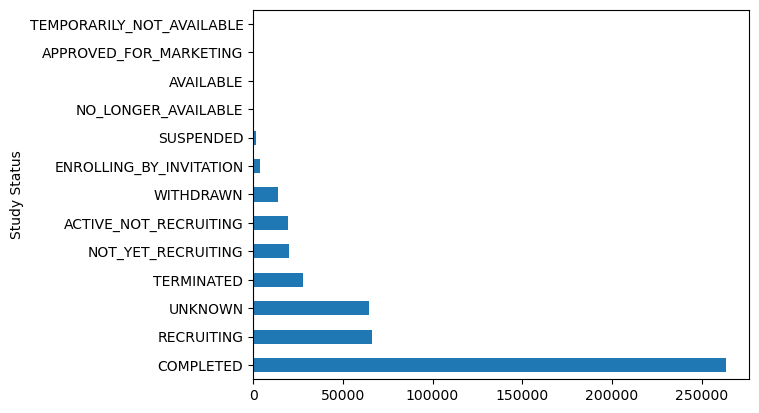

In [82]:
# Let's visualize this with a bar chart
plt.figure()

df['Study Status'].value_counts().plot(kind='barh')

plt.show()

There are a lot of different categories in this column. We should remove the categories that are not related to the scope of the problem, such has 'Temporarily_not_available', 'Approved_For_Marketing'...

In [84]:
df['Sponsor'].value_counts()

Sponsor
GlaxoSmithKline                          3483
National Cancer Institute (NCI)          3410
Assiut University                        3334
Pfizer                                   3045
AstraZeneca                              3024
                                         ... 
Plotnikoff, Gregory A., M.D.                1
Májbetegekért Alapítvány                    1
Universidad Francisco Marroquín             1
Dr. Erfan and Bagedo General Hospital       1
U.S. Nutraceuticals, LLC                    1
Name: count, Length: 41664, dtype: int64

In [ ]:
plt.figure()

df['Sponsor'].value_counts().plot(kind='bar')

plt.show()


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000001DB2BB76A20> (for post_execute):



KeyboardInterrupt

